In [233]:
import pandas as pd
import matplotlib.pyplot as plt

## Stir-Fry Experiments

In [234]:
path_prefix = "data/stirfry/"
data = pd.read_csv(f"{path_prefix}trial1_data.csv", parse_dates=True)

data["Time"] = pd.to_datetime(data["Time"])

data_2 = pd.read_csv(f"{path_prefix}trial2_data.csv")
data_2["Time"] = pd.to_datetime(data_2["Time"])

data_3 = pd.read_csv(f"{path_prefix}trial3_data.csv")
data_3["Time"] = pd.to_datetime(data_3["Time"])

data_4 = pd.read_csv(f"{path_prefix}trial4_data.csv")
data_4["Time"] = pd.to_datetime(data_4["Time"])


In [235]:
def plot_stir_fry(ex_data, time_data, trial_name=None, time_line=5):
    plt.figure()
    plt.plot(ex_data["Time Delta"], ex_data["PM 2.5 Env"], label=f"PM 2.5 {trial_name}", linewidth=0.2)
    plt.plot(time_data, [time_line, time_line], label="Cooking Time")
    plt.xlabel("Time From Trial Start (hr)", size=14)
    plt.ylabel("$PM_{2.5} (ug/m^3)$", size=14)
    plt.legend()
    

In [236]:
def plot_particle(ex_data, trial_name=None):
    # get get averages for each bin
    
    plt.figure()
    labels = ["0.3-0.5", "0.5-1", "1-2.5", "2.5-5", "5-10", ">10"]
    averages = ex_data.mean()
    std = ex_data.std()
    x_data = [averages["> 0.3 um"], averages["> 0.5 um"], averages["> 1 um"], averages["> 2.5 um"], averages["> 5 um"], averages["> 10 um"]]
    y_err = [std["> 0.3 um"], std["> 0.5 um"], std["> 1 um"], std["> 2.5 um"], std["> 5 um"], std["> 10 um"]]
    plt.bar(labels, x_data)
    plt.errorbar(labels, x_data, y_err, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
    plt.ylabel("Particle Count", size=14)
    plt.xlabel("Size (um)", size=14)

C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\3621567785.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_1_sf["Time Delta"] = (trial_1_sf["Time"] - trial_1_times[0])
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\3621567785.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_1_sf["Time Delta"] = trial_1_sf["Time Delta"].dt.total_seconds() / 3600
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2553596195.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=Non

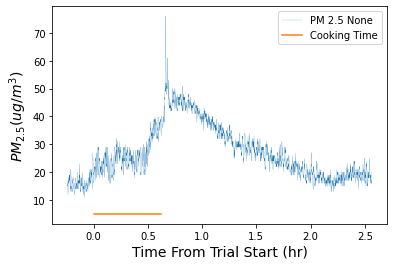

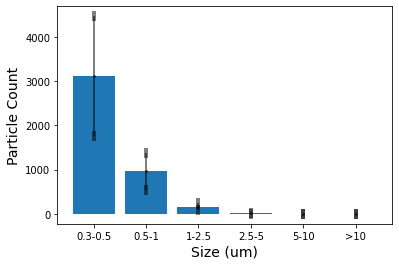

In [237]:
before = data[data["Time"] > pd.Timestamp(year=2024, month=4, day=10, hour=22)]
trial_1_sf = before[before["Time"] < pd.Timestamp(year=2024, month=4, day=11, hour=1, minute=20)]


trial_1_times = [pd.Timestamp(year=2024, month=4, day=10, hour=22, minute=46), pd.Timestamp(year=2024, month=4, day=10, hour=23, minute=23)]

cooking_mask = (trial_1_sf["Time"] > trial_1_times[0]) & (trial_1_sf["Time"] < trial_1_times[1])


trial_1_cooking = trial_1_sf.loc[cooking_mask]
trial_1_cooldown = trial_1_sf[trial_1_sf["Time"] > trial_1_times[1]]

# normalize time
trial_1_sf["Time Delta"] = (trial_1_sf["Time"] - trial_1_times[0])

trial_1_sf["Time Delta"] = trial_1_sf["Time Delta"].dt.total_seconds() / 3600

trial_1_times_norm = [(x - trial_1_times[0]).total_seconds() / 3600 for x in trial_1_times]

plot_stir_fry(trial_1_sf, trial_1_times_norm)

plot_particle(trial_1_sf)



C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\595453775.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_2_sf["Time Delta"] = (trial_2_sf["Time"] - trial_2_times[0])
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\595453775.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_2_sf["Time Delta"] = trial_2_sf["Time Delta"].dt.total_seconds() / 3600
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2553596195.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None 

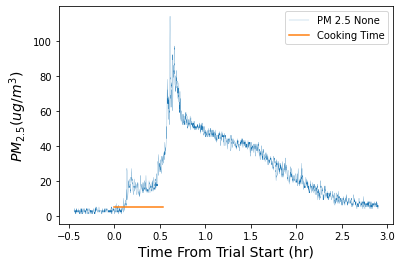

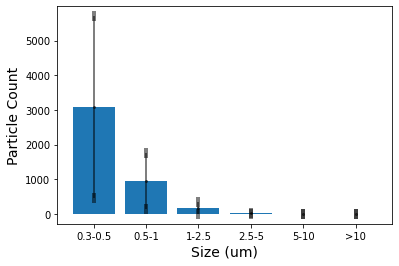

In [238]:
before2 = data_2[data_2["Time"] > pd.Timestamp(year=2024, month=4, day=17, hour=22)]
trial_2_sf = before2[before2["Time"] < pd.Timestamp(year=2024, month=4, day=18, hour=2)]


trial_2_times = [pd.Timestamp(year=2024, month=4, day=17, hour=23, minute=6), pd.Timestamp(year=2024, month=4, day=17, hour=23, minute=38)]

cooking_mask_2 = (trial_2_sf["Time"] > trial_2_times[0]) & (trial_2_sf["Time"] < trial_2_times[1])


trial_2_cooking = trial_2_sf.loc[cooking_mask_2]
trial_2_cooldown = trial_2_sf[trial_2_sf["Time"] > trial_2_times[1]]

# normalize time
trial_2_sf["Time Delta"] = (trial_2_sf["Time"] - trial_2_times[0])

trial_2_sf["Time Delta"] = trial_2_sf["Time Delta"].dt.total_seconds() / 3600

trial_2_times_norm = [(x - trial_2_times[0]).total_seconds() / 3600 for x in trial_2_times]


plot_stir_fry(trial_2_sf, trial_2_times_norm)
plot_particle(trial_2_sf)

C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\368660964.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_3_sf["Time Delta"] = (trial_3_sf["Time"] - trial_3_times[0])
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\368660964.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_3_sf["Time Delta"] = trial_3_sf["Time Delta"].dt.total_seconds() / 3600
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2553596195.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None 

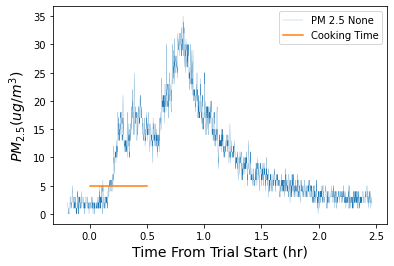

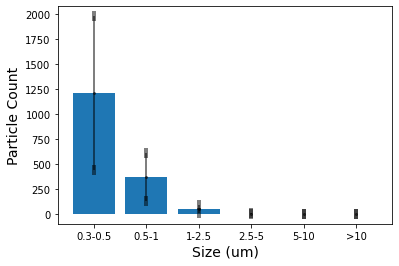

In [239]:
before3 = data_3[data_3["Time"] > pd.Timestamp(year=2024, month=4, day=18, hour=21)]
trial_3_sf = before3[before3["Time"] < pd.Timestamp(year=2024, month=4, day=19, hour=0)]


trial_3_times = [pd.Timestamp(year=2024, month=4, day=18, hour=21, minute=32), pd.Timestamp(year=2024, month=4, day=18, hour=22, minute=2)]

cooking_mask_3 = (trial_3_sf["Time"] > trial_3_times[0]) & (trial_3_sf["Time"] < trial_3_times[1])

trial_3_cooking = trial_3_sf.loc[cooking_mask_3]
trial_3_cooldown = trial_3_sf[trial_3_sf["Time"] > trial_3_times[1]]

# normalize time
trial_3_sf["Time Delta"] = (trial_3_sf["Time"] - trial_3_times[0])

trial_3_sf["Time Delta"] = trial_3_sf["Time Delta"].dt.total_seconds() / 3600

trial_3_times_norm = [(x - trial_3_times[0]).total_seconds() / 3600 for x in trial_3_times]

plot_stir_fry(trial_3_sf, trial_3_times_norm)

plot_particle(trial_3_sf)





C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\1782492384.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_4_sf["Time Delta"] = (trial_4_sf["Time"] - trial_4_times[0])
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\1782492384.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_4_sf["Time Delta"] = trial_4_sf["Time Delta"].dt.total_seconds() / 3600


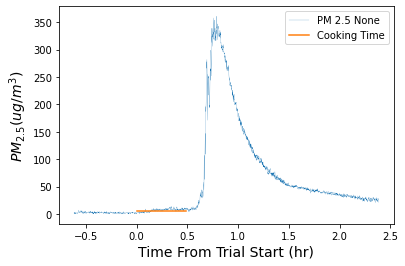

In [240]:
# when i burned the food
before4 = data_4[data_4["Time"] > pd.Timestamp(year=2024, month=4, day=23, hour=23)]
trial_4_sf = before4[before4["Time"] < pd.Timestamp(year=2024, month=4, day=24, hour=2)]


trial_4_times = [pd.Timestamp(year=2024, month=4, day=23, hour=23, minute=37), pd.Timestamp(year=2024, month=4, day=24, hour=0, minute=6)]

cooking_mask_4 = (trial_4_sf["Time"] > trial_4_times[0]) & (trial_4_sf["Time"] < trial_4_times[1])

trial_4_cooking = trial_4_sf.loc[cooking_mask_4]
trial_4_cooldown = trial_4_sf[trial_4_sf["Time"] > trial_4_times[1]]

# normalize time
trial_4_sf["Time Delta"] = (trial_4_sf["Time"] - trial_4_times[0])

trial_4_sf["Time Delta"] = trial_4_sf["Time Delta"].dt.total_seconds() / 3600

trial_4_times_norm = [(x - trial_4_times[0]).total_seconds() / 3600 for x in trial_4_times]

plot_stir_fry(trial_4_sf, trial_4_times_norm)

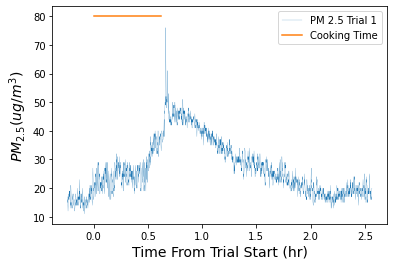

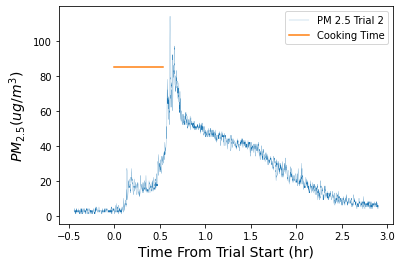

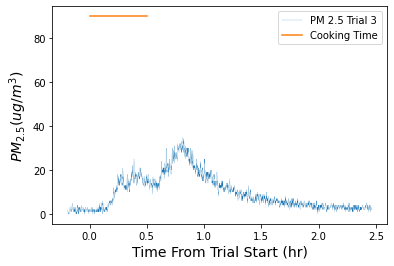

In [241]:
plot_stir_fry(trial_1_sf, trial_1_times_norm, trial_name="Trial 1", time_line=80)
plot_stir_fry(trial_2_sf, trial_2_times_norm, trial_name="Trial 2", time_line=85)
plot_stir_fry(trial_3_sf, trial_3_times_norm, trial_name="Trial 3", time_line=90)

In [242]:
import numpy as np
def plot_grouped_barplot(data_array):
    x = np.arange(6)  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0
    
    measurement_data = {}
    
    for i, ex_data in enumerate(data_array):
        averages = ex_data.mean()
        x_data = [averages["> 0.3 um"], averages["> 0.5 um"], averages["> 1 um"], averages["> 2.5 um"], averages["> 5 um"], averages["> 10 um"]]
        measurement_data[f"Trial {i+1}"] = x_data
        

    fig, ax = plt.subplots(layout='constrained')
    for attribute, measurement in measurement_data.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        multiplier += 1
    labels = ["0.3-0.5", "0.5-1", "1-2.5", "2.5-5", "5-10", ">10"]
    ax.set_xticks(x + width, labels)
    ax.legend()


    ax.set_ylabel("Particle Count", size=14)
    ax.set_xlabel("Size (um)", size=14)

C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\1547062380.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  averages = ex_data.mean()


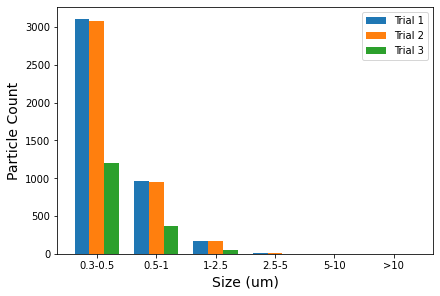

In [243]:
plot_grouped_barplot([trial_1_sf, trial_2_sf, trial_3_sf])

### Times

### Averages

In [244]:
# averages during the cooking period 

cooking_periods = [trial_1_cooking, trial_2_cooking, trial_3_cooking]
cooldown_periods = [trial_1_cooldown, trial_2_cooldown, trial_3_cooldown]
cooking_averages = [x["PM 2.5 Env"].mean() for x in cooking_periods]
cooking_std = [x["PM 2.5 Env"].std() for x in cooking_periods]

cooldown_averages = [x["PM 2.5 Env"].mean() for x in cooldown_periods]
cooldown_std = [x["PM 2.5 Env"].std() for x in cooldown_periods]


for i, average in enumerate(cooldown_averages):
    print(f"Trial {i+1} Cooldown Average = {average} +- {cooldown_std[i]}")
    
for i, average in enumerate(cooking_averages):
    print(f"Trial {i+1} Cooking Average = {average} +- {cooking_std[i]}")

# total averages 
trial_data = [trial_1_sf, trial_2_sf, trial_3_sf]
total_averages = [x["PM 2.5 Env"].mean() for x in trial_data]
total_std = [x["PM 2.5 Env"].std() for x in trial_data]
for i, average in enumerate(total_averages):
    print(f"Trial {i+1} Total Average = {average} +- {total_std[i]}")


Trial 1 Cooldown Average = 28.512210012210012 +- 10.176826116298617
Trial 2 Cooldown Average = 31.037251447269067 +- 19.352721162961306
Trial 3 Cooldown Average = 10.286319612590798 +- 8.13928739432775
Trial 1 Cooking Average = 25.727799227799228 +- 5.2015641815256695
Trial 2 Cooking Average = 14.897206703910614 +- 7.7127210512420765
Trial 3 Cooking Average = 9.879761904761905 +- 6.535759884925244
Trial 1 Total Average = 26.849204665959704 +- 9.500125990249307
Trial 2 Total Average = 24.680192205018688 +- 19.5630731610482
Trial 3 Total Average = 9.599193909538737 +- 7.863854929719377


### Times

In [263]:
from statistics import mean
def get_time_diff(data):
    # Get the first and last date from the 'date' column
    first_date = data['Time'].min()
    last_date = data['Time'].max()

    # Calculate the difference
    time_difference = last_date - first_date

    # Convert the difference to hours
    hours_difference = time_difference.total_seconds() / 3600
    
    return hours_difference

mean_time = mean([get_time_diff(x) for x in cooking_periods])
mean_cooldown = mean([get_time_diff(x) for x in cooldown_periods])

print(mean_time)
mean_cooldown


0.5494795697222222


2.093888102962963

### Exposure

In [245]:
# start with a quick approach to doing exposure of average * interval time
def calculate_exposure_easy(data, average):
    # Get the first and last date from the 'date' column
    first_date = data['Time'].min()
    last_date = data['Time'].max()

    # Calculate the difference
    time_difference = last_date - first_date

    # Convert the difference to hours
    hours_difference = time_difference.total_seconds() / 3600
    
    print(f"The exposure is {hours_difference*average} ug*h / m*3")


for data, average in zip(trial_data, total_averages):
    calculate_exposure_easy(data, average)

    
    
    
    

The exposure is 75.35011334370414 ug*h / m*3
The exposure is 82.58281669913835 ug*h / m*3
The exposure is 25.508920343989775 ug*h / m*3


### Peaks

In [246]:
data = [trial_1_sf, trial_2_sf, trial_3_sf]

peaks = [x["PM 2.5 Env"].max() for x in data]

print(peaks)

[76, 114, 35]


## 3D Printing Experiments

In [247]:
datap_prefix = "data/printer/"

data_1p = pd.read_csv(f"{datap_prefix}trial1p_data.csv")
data_1p["Time"] = pd.to_datetime(data_1p["Time"])

data_2p = pd.read_csv(f"{datap_prefix}trial2p_data.csv")
data_2p["Time"] = pd.to_datetime(data_2p["Time"])

data_3p = pd.read_csv(f"{datap_prefix}trial3p_data.csv")
data_3p["Time"] = pd.to_datetime(data_3p["Time"])

data_3p_2 = pd.read_csv(f"{datap_prefix}trial3p_2_data.csv")
data_3p_2["Time"] = pd.to_datetime(data_3p_2["Time"])



# join data for trial 3
data_3p = pd.concat([data_3p, data_3p_2])



In [248]:
def plot_printer(ex_data, time_data):
    plt.plot(ex_data["Time Delta"], ex_data["PM 2.5 Env"], label="PM 2.5", linewidth=0.2)
    plt.plot(time_data, [5, 5], label="Printing Time")
    plt.xlabel("Time After Trial Start (hr)", size=14)
    plt.ylabel("$PM_{2.5}$", size=14)
    plt.legend()

C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2553596195.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  averages = ex_data.mean()


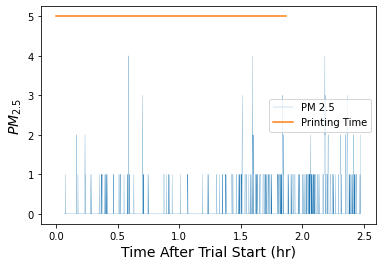

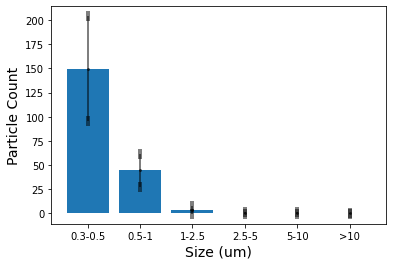

In [256]:

trial_1p_times = [pd.Timestamp(year=2024, month=4, day=21, hour=11, minute=27), pd.Timestamp(year=2024, month=4, day=21, hour=13, minute=19)]

time_before = trial_1p_times[0] - pd.Timedelta(hours=1)
time_after = trial_1p_times[1] + pd.Timedelta(hours=1)

before_1p = data_1p[data_1p["Time"] > time_before]
trial_1_p = before_1p[before_1p["Time"] < time_after]

# normalize time
trial_1_p["Time Delta"] = (trial_1_p["Time"] - trial_1p_times[0])

trial_1_p["Time Delta"] = trial_1_p["Time Delta"].dt.total_seconds() / 3600

trial_1p_times_norm = [(x - trial_1p_times[0]).total_seconds() / 3600 for x in trial_1p_times]


exact_trial_1 = data_1p[data_1p["Time"] > trial_1p_times[0]]
exact_trial_1 = exact_trial_1[exact_trial_1["Time"] < trial_1p_times[1]]

plot_printer(trial_1_p, trial_1p_times_norm)
plot_particle(trial_1_p)

C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2553596195.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  averages = ex_data.mean()


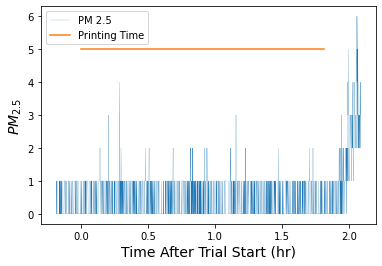

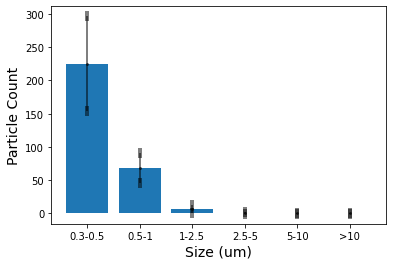

In [257]:
trial_2p_times = [pd.Timestamp(year=2024, month=4, day=22, hour=8, minute=7), pd.Timestamp(year=2024, month=4, day=22, hour=9, minute=56)]

time_before = trial_2p_times[0] - pd.Timedelta(hours=1)
time_after = trial_2p_times[1] + pd.Timedelta(hours=1)

before_2p = data_2p[data_2p["Time"] > time_before]
trial_2_p = before_2p[before_2p["Time"] < time_after]

# normalize time
trial_2_p["Time Delta"] = (trial_2_p["Time"] - trial_2p_times[0])

trial_2_p["Time Delta"] = trial_2_p["Time Delta"].dt.total_seconds() / 3600

trial_2p_times_norm = [(x - trial_2p_times[0]).total_seconds() / 3600 for x in trial_2p_times]

exact_trial_2 = data_2p[data_2p["Time"] > trial_2p_times[0]]
exact_trial_2 = exact_trial_2[exact_trial_2["Time"] < trial_2p_times[1]]


plot_printer(trial_2_p, trial_2p_times_norm)
plot_particle(trial_2_p)

C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2725802763.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_3_p["Time Delta"] = (trial_3_p["Time"] - trial_3p_times[0])
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2725802763.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_3_p["Time Delta"] = trial_3_p["Time Delta"].dt.total_seconds() / 3600
C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\2553596195.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None w

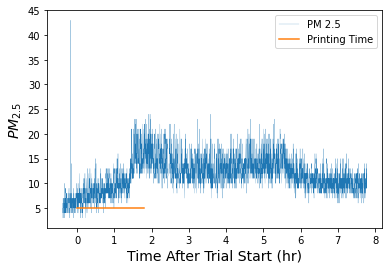

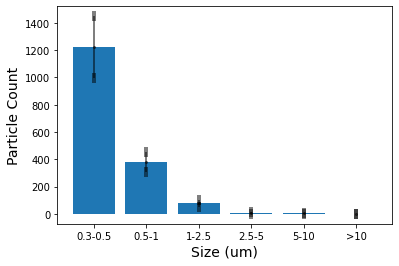

In [255]:
trial_3p_times = [pd.Timestamp(year=2024, month=4, day=24, hour=9, minute=26), pd.Timestamp(year=2024, month=4, day=24, hour=11, minute=13)]

time_before = trial_3p_times[0] - pd.Timedelta(hours=1)
time_after = trial_3p_times[1] + pd.Timedelta(hours=6)

before_3p = data_3p[data_3p["Time"] > time_before]
trial_3_p = before_3p[before_3p["Time"] < time_after]

# normalize time
trial_3_p["Time Delta"] = (trial_3_p["Time"] - trial_3p_times[0])

trial_3_p["Time Delta"] = trial_3_p["Time Delta"].dt.total_seconds() / 3600

trial_3p_times_norm = [(x - trial_3p_times[0]).total_seconds() / 3600 for x in trial_3p_times]

exact_trial_3 = data_3p[data_3p["Time"] > trial_3p_times[0]]
exact_trial_3 = exact_trial_3[exact_trial_3["Time"] < trial_3p_times[1]]



plot_printer(trial_3_p, trial_3p_times_norm)
plot_particle(trial_3_p)

C:\Users\jacka\AppData\Local\Temp\ipykernel_16432\1547062380.py:10: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  averages = ex_data.mean()


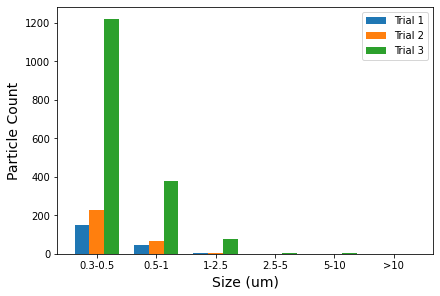

In [ ]:
plot_grouped_barplot([trial_1_p, trial_2_p, trial_3_p])

### Averages

In [258]:
trial_data_p = [exact_trial_1, exact_trial_2, exact_trial_3]

averages = [x["PM 2.5 Env"].mean() for x in trial_data_p]
std = [x["PM 2.5 Env"].std() for x in trial_data_p]

for i, avg in enumerate(averages):
    print(f"Trial {i+1} average = {avg} +- {std[i]}")

Trial 1 average = 0.11840369393139842 +- 0.3777431610286748
Trial 2 average = 0.4223968565815324 +- 0.5438842164896422
Trial 3 average = 9.973956594323873 +- 3.4389400725267976


### Peaks

In [259]:
maxes = [x["PM 2.5 Env"].max() for x in trial_data_p]
for i, max in enumerate(maxes):
    print(f"Trial {i+1} max = {max}")

Trial 1 max = 4
Trial 2 max = 4
Trial 3 max = 23


### Exposure

In [260]:
for data, average in zip(trial_data_p, averages):
    calculate_exposure_easy(data, average)


The exposure is 0.21349117672007842 ug*h / m*3
The exposure is 0.7668799562077058 ug*h / m*3
The exposure is 17.780903824802817 ug*h / m*3
